In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(amax, dc, ff, ph, nn, fs):
    tt = np.linspace(0, (nn-1) / fs, nn)
    xx = amax * np.sin(2 * np.pi * ff * tt + ph) + dc

    return tt, xx

### Demostración de funcionamiento

A continuación se grafica una señal con los siguientes parámetros:
* $A_{max} = 2$
* $offset = 1$
* $f_0 = 1 Hz$
* $\theta = 0$
* $N = 10000$
* $f_s = 1000 Hz$

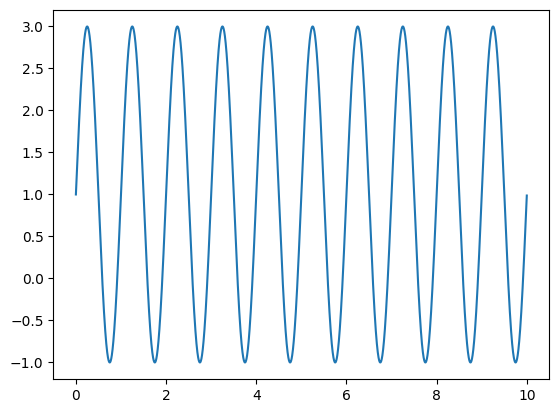

In [2]:
tt,xx = mi_funcion_sen(amax = 2, dc = 1, ff = 1, ph = 0, nn = 10000, fs = 1000)
plt.plot(tt,xx)

### Observación de fenómenos de aliasing

A continuación, se grafican 8 señales senoidales con $f_s = 100 Hz$. Para las mismas, se eligieron las siguientes $f_0$:
* $1, 25$: Por debajo de Nyquist
* $49$: Por debajo pero muy cercana a Nyquist
* $50$: Nyquist
* $75$: el "reflejo" de 25 (ya que está 25 por debajo de $f_s$)
* $99$: el "reflejo" de 1 (ya que está 1 por debajo de $f_s$)
* $100$: $f_s$ (equivale a muestrear DC)
* $-2$: equivalente a una frecuencia de 2, con la fase invertida

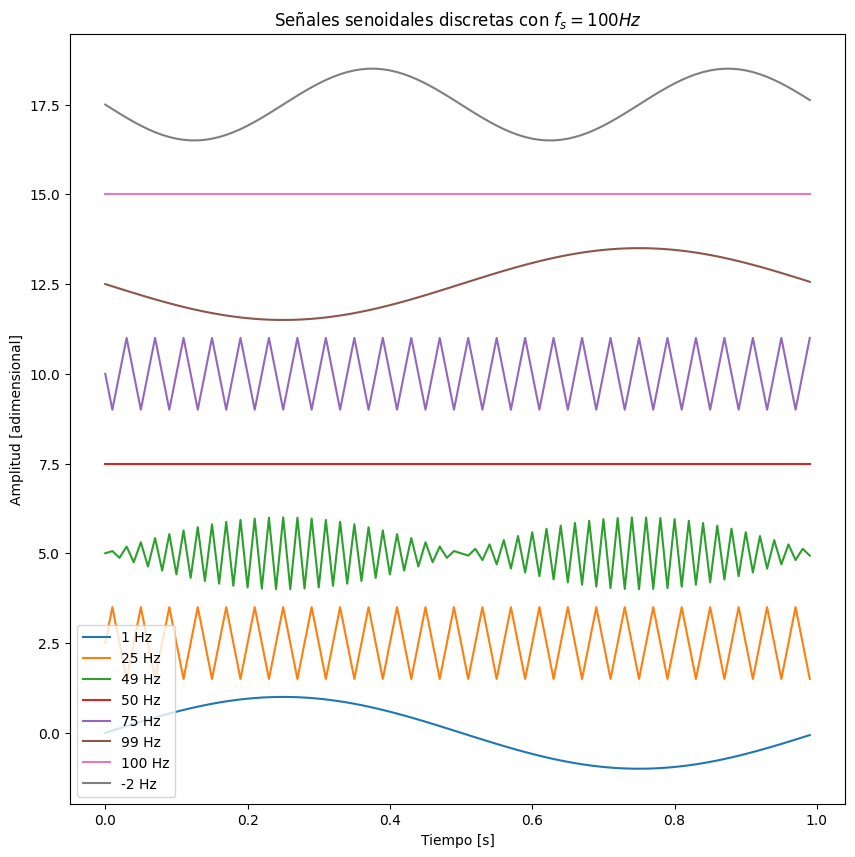

In [3]:
N = fs = 100

f0s = [1,25,49,50,75,99,100,-2]

plt.figure(figsize=[10,10])
plt.title(f'Señales senoidales discretas con $f_s={fs} Hz$')
plt.ylabel('Amplitud [adimensional]')
plt.xlabel('Tiempo [s]')

for offset,f0 in enumerate(f0s):
    t_,x_ = mi_funcion_sen(amax = 1, ph = 0, dc = offset * 2.5, ff = f0, fs = fs, nn = N)
    plt.plot(t_,x_,label=f'{f0} Hz')

plt.legend()